In [3]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
BIG_MODELS = ["meta-llama/Llama-3.2-3B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "allenai/OLMo-2-1124-13B", "google/gemma-2-9b"]

In [5]:
dfs = [pd.read_csv(os.path.join("../results", model, "Calibration", "regression_analysis.csv")) for model in BIG_MODELS]
results = pd.concat(dfs, axis=0)

In [6]:
# Inspect DF
results.head()

,Unnamed: 0,Model,Dataset,Condition,MAE,MSE,KL,Pearson R,Entropy Correlation,Expert Correlation
0,0,meta-llama/Llama-3.2-3B,Hu et al. 2025a,Linear_Representation,0.224525,0.073646,0.221615,0.653614,0.030674,-0.000414
1,1,meta-llama/Llama-3.2-3B,Hu et al. 2025a,Probability,0.272339,0.110462,0.298386,0.369614,-0.075032,-0.210097
2,2,meta-llama/Llama-3.2-3B,Hu et al. 2025a,PC,0.290094,0.117994,0.322816,0.318684,-0.270699,-0.226395
3,3,meta-llama/Llama-3.2-3B,Hu et al. 2025a,Random,0.310103,0.141217,0.368684,-0.055516,-0.140168,-0.300440
4,4,meta-llama/Llama-3.2-3B,Hu et al. 2025b,Linear_Representation,0.143929,0.044447,0.359082,0.752018,0.459520,0.562416


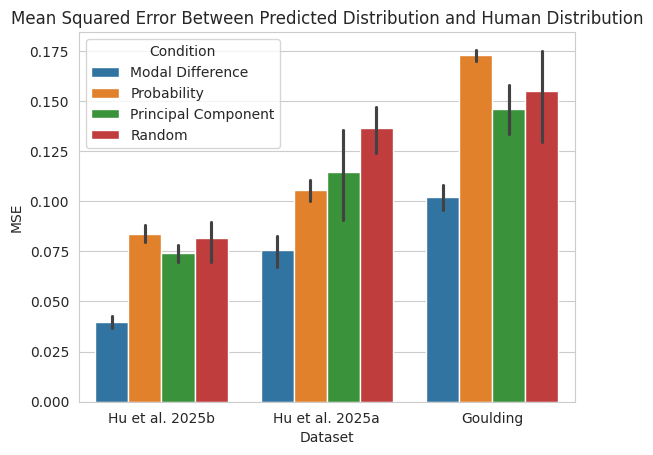

In [7]:
sns.set_style("whitegrid")
g = sns.barplot(data=results, x="Dataset", y="MSE", hue="Condition", order=["Hu et al. 2025b", "Hu et al. 2025a", "Goulding"])
g.get_legend().get_texts()[0].set_text('Modal Difference') 
g.get_legend().get_texts()[2].set_text('Principal Component') 
plt.title("Mean Squared Error Between Predicted Distribution and Human Distribution")
plt.savefig("../Figures/Study3_MSE.pdf", format="pdf", bbox_inches="tight")
plt.show()

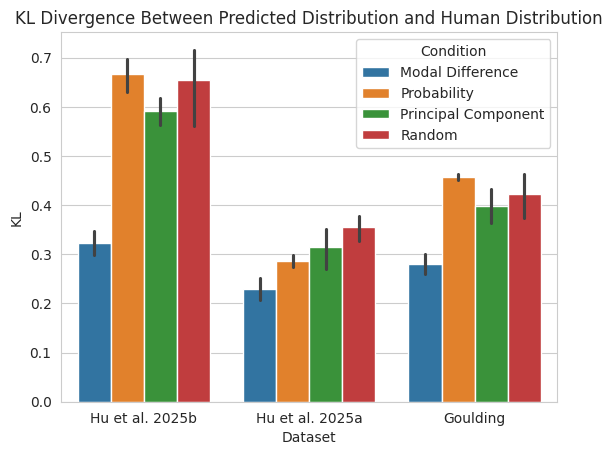

In [8]:
sns.set_style("whitegrid")
g = sns.barplot(data=results, x="Dataset", y="KL", hue="Condition", order=["Hu et al. 2025b", "Hu et al. 2025a", "Goulding"])
g.get_legend().get_texts()[0].set_text('Modal Difference') 
g.get_legend().get_texts()[2].set_text('Principal Component') 
plt.title("KL Divergence Between Predicted Distribution and Human Distribution")
plt.savefig("../Figures/Study3_KL.pdf", format="pdf", bbox_inches="tight")
plt.show()

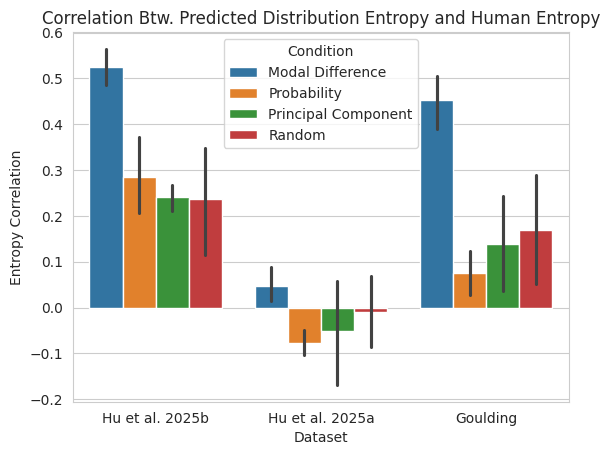

In [9]:
sns.set_style("whitegrid")
g = sns.barplot(data=results, x="Dataset", y="Entropy Correlation", hue="Condition", order=["Hu et al. 2025b", "Hu et al. 2025a", "Goulding"])
g.get_legend().get_texts()[0].set_text('Modal Difference') 
g.get_legend().get_texts()[2].set_text('Principal Component') 
plt.title("Correlation Btw. Predicted Distribution Entropy and Human Entropy")
plt.savefig("../Figures/Study3_Entropy_Correlation.pdf", format="pdf", bbox_inches="tight")
plt.show()

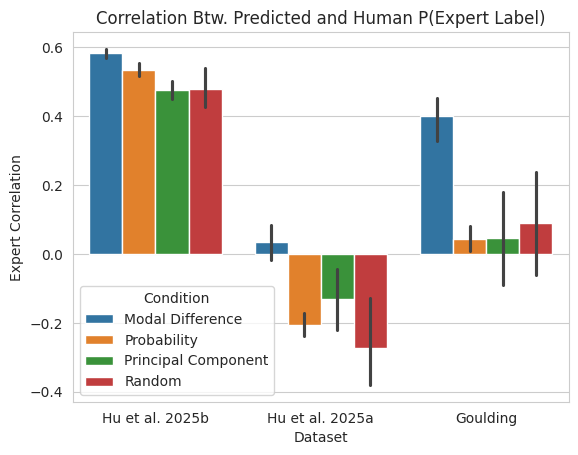

In [10]:
sns.set_style("whitegrid")
g = sns.barplot(data=results, x="Dataset", y="Expert Correlation", hue="Condition", order=["Hu et al. 2025b", "Hu et al. 2025a", "Goulding"])
g.get_legend().get_texts()[0].set_text('Modal Difference') 
g.get_legend().get_texts()[2].set_text('Principal Component') 
plt.title("Correlation Btw. Predicted and Human P(Expert Label)")
plt.savefig("../Figures/Study3_Expert_Correlation.pdf", format="pdf", bbox_inches="tight")
plt.show()

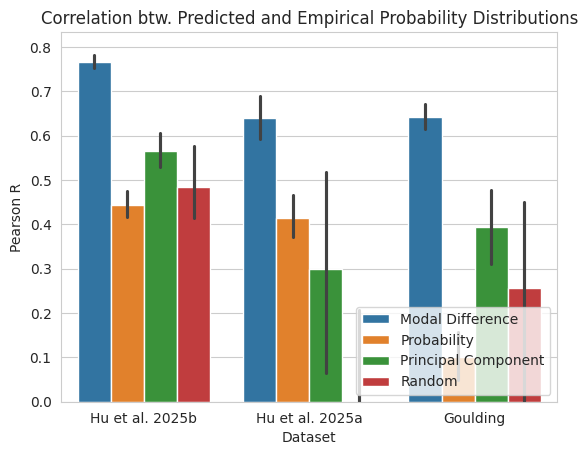

In [11]:

sns.set_style("whitegrid")
g = sns.barplot(data=results, x="Dataset", y="Pearson R", hue="Condition", order=["Hu et al. 2025b", "Hu et al. 2025a", "Goulding"])
plt.title("Correlation btw. Predicted and Empirical Probability Distributions")
plt.ylim(bottom=0)
plt.legend(loc="lower right")
g.get_legend().get_texts()[0].set_text('Modal Difference') 
g.get_legend().get_texts()[2].set_text('Principal Component') 
plt.savefig("../Figures/Study3_Correlation.pdf", format="pdf", bbox_inches="tight")
plt.show()

Someone lit a candle using a blowtorch.
[-1.77849932 -1.38846068]... 0.2702702702702703,0.7297297297297297,0.0,0.0

Someone built a house out of grass.
[-0.47325087 -0.35990382].... 0.0,0.6521739130434783,0.34782608695652173,0.0

Someone cleaned a carpet using a hat.
[ 0.85646864 -1.31085759]... 0.0,0.5121951219512195,0.3902439024390244,0.0975609756097561